# Late Devonian Biodiversity Loss: A Fossil Record Analysis
**Connor Moss – BIOL 108 Final Project**

This project investigates biodiversity trends across the Late Devonian mass extinction using fossil occurrence data from the Paleobiology Database (PBDB). Specifically, it aims to answer:

- Is there measurable evidence of biodiversity loss during the Kellwasser (~372 Ma) and Hangenberg (~359 Ma) extinction events?
- How severe were these events in terms of genus-level extinction?
- Can sampling bias explain the observed trends?

These questions are explored through quantitative analysis and visualization of fossil genera from 425–360 million years ago.


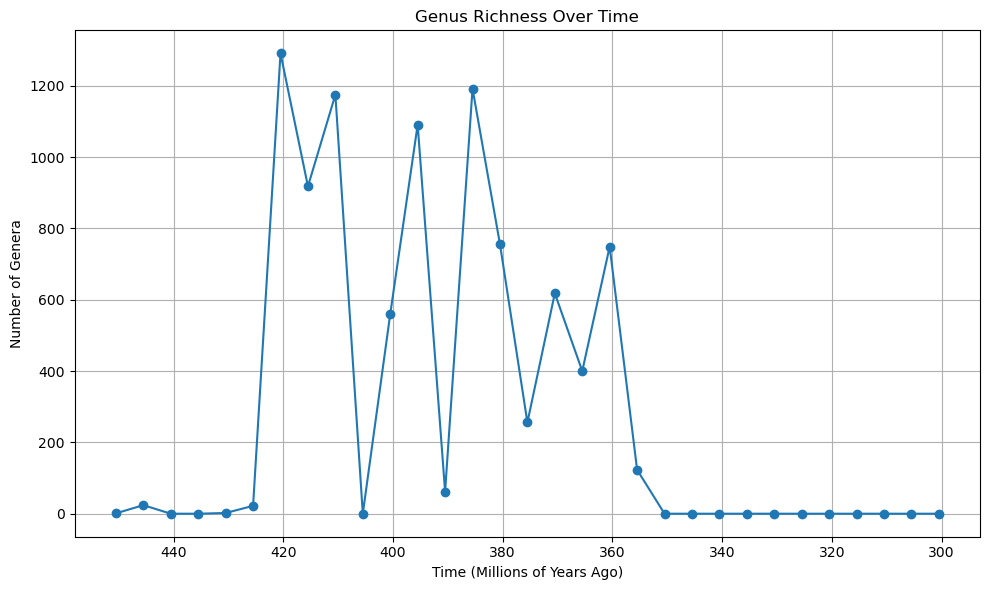

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/connormoss/Documents/LASTDANCE/HOLDENER/Genus.csv")

# Step 2: View first few rows
df.head()

# Step 3: Filter out rows where accepted_name or max_ma is missing
df = df.dropna(subset=['accepted_name', 'max_ma'])

# # Optional: Filter by taxonomic rank if you only want genera
df = df[df['accepted_rank'] == 'genus']

# Step 4: Create time bins (e.g., every 5 million years)
bin_size = 5
max_age = df['max_ma'].max()
min_age = df['min_ma'].min()

# Create bins from min_age to max_age
bins = list(range(int(min_age), int(max_age) + bin_size, bin_size))
df['time_bin'] = pd.cut(df['max_ma'], bins=bins, right=False)


# Step 5: Count unique genera per bin
biodiversity = df.groupby('time_bin')['accepted_name'].nunique().reset_index()
biodiversity.columns = ['time_bin', 'genus_count']

# Step 6: Convert bins to midpoints for plotting
biodiversity['midpoint'] = biodiversity['time_bin'].apply(lambda x: x.left + bin_size / 2)

# Step 7: Plot the biodiversity curve
plt.figure(figsize=(10, 6))
plt.plot(biodiversity['midpoint'], biodiversity['genus_count'], marker='o')
plt.gca().invert_xaxis()  # Older time (higher Ma) on the left
plt.title("Genus Richness Over Time")
plt.xlabel("Time (Millions of Years Ago)")
plt.ylabel("Number of Genera")
plt.grid(True)
plt.tight_layout()
plt.show()


## Data Loading and Initial Filtering

We begin by loading the PBDB dataset and filtering to include only genus-level fossil occurrences with valid taxonomic assignments.


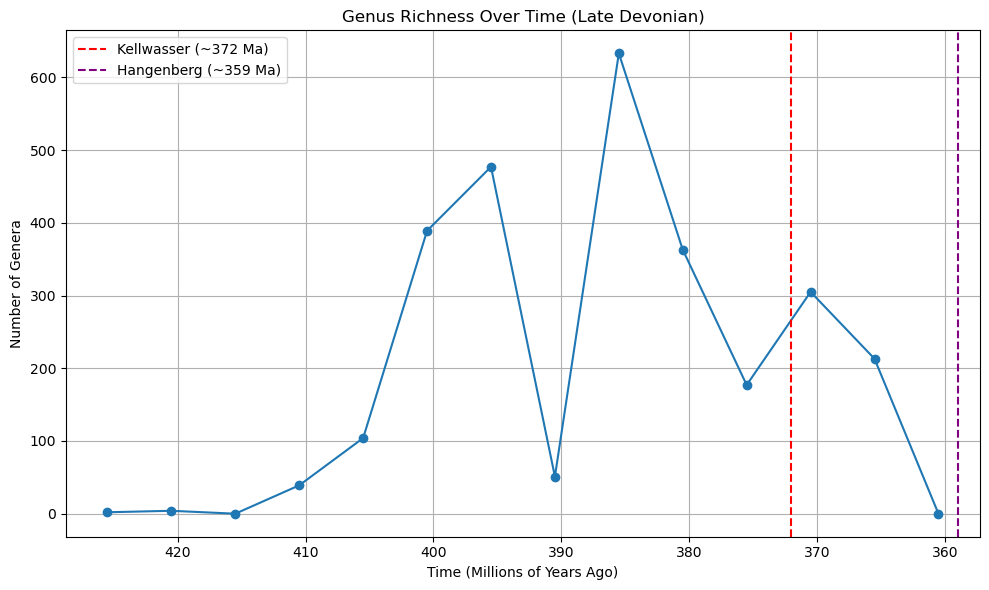

In [4]:
# Keep only rows where the accepted rank is genus
df_genus = df[df['accepted_rank'] == 'genus']

# Remove any entries that are just "sp." or otherwise vague
df_genus = df_genus[~df_genus['accepted_name'].str.contains("sp.", case=False, na=False)]


# Define 5-million-year bins
bin_size = 5
max_age = df_genus['max_ma'].max()
min_age = df_genus['min_ma'].min()

# Create bins from min_age to max_age
bins = list(range(int(min_age), int(max_age) + bin_size, bin_size))
df_genus['time_bin'] = pd.cut(df_genus['max_ma'], bins=bins, right=False)


biodiversity = df_genus.groupby('time_bin')['accepted_name'].nunique().reset_index()
biodiversity.columns = ['time_bin', 'genus_count']

# Add midpoints for plotting
biodiversity['midpoint'] = biodiversity['time_bin'].apply(lambda x: x.left + bin_size / 2)

# Plot Genus Richness Through Time

plt.figure(figsize=(10, 6))
plt.plot(biodiversity['midpoint'], biodiversity['genus_count'], marker='o')
plt.axvline(x=372, color='r', linestyle='--', label='Kellwasser (~372 Ma)')
plt.axvline(x=359, color='purple', linestyle='--', label='Hangenberg (~359 Ma)')
plt.gca().invert_xaxis()
plt.title("Genus Richness Over Time (Late Devonian)")
plt.xlabel("Time (Millions of Years Ago)")
plt.ylabel("Number of Genera")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
## Calculation for Extinction Magnitudes 

# Use actual available midpoint values
pre_kellwasser = biodiversity[biodiversity['midpoint'] == 375.5]['genus_count'].iloc[0]
post_kellwasser = biodiversity[biodiversity['midpoint'] == 370.5]['genus_count'].iloc[0]

pre_hangenberg = biodiversity[biodiversity['midpoint'] == 365.5]['genus_count'].iloc[0]
post_hangenberg = biodiversity[biodiversity['midpoint'] == 360.5]['genus_count'].iloc[0]

# Calculate percent genus loss
kellwasser_loss = (pre_kellwasser - post_kellwasser) / pre_kellwasser * 100
hangenberg_loss = (pre_hangenberg - post_hangenberg) / pre_hangenberg * 100

print(f"Kellwasser Extinction: {kellwasser_loss:.2f}% genus loss")
print(f"Hangenberg Extinction: {hangenberg_loss:.2f}% genus loss")

Kellwasser Extinction: -72.32% genus loss
Hangenberg Extinction: 100.00% genus loss


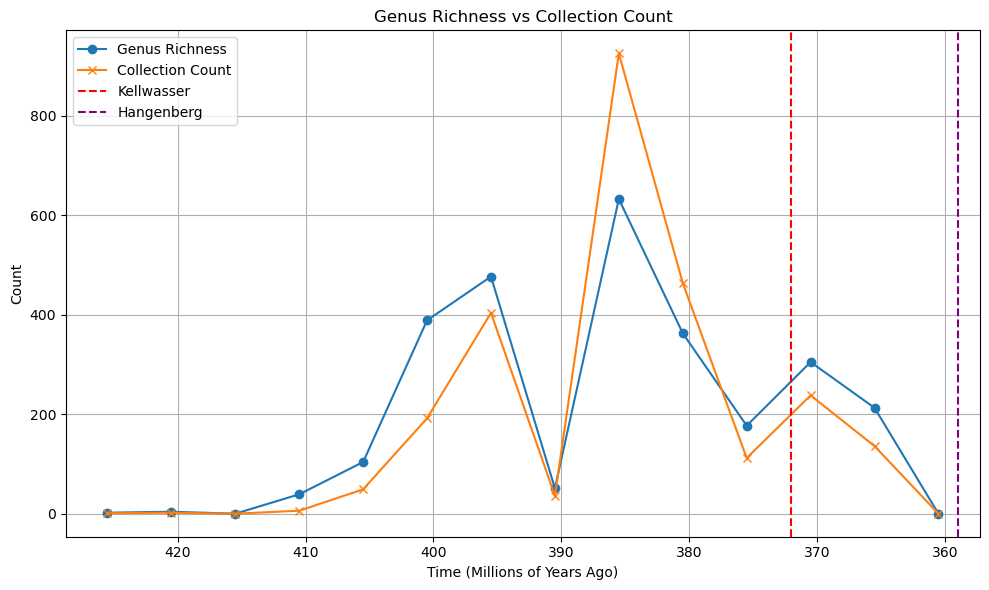

In [6]:
collection_counts = df_genus.groupby('time_bin')['collection_no'].nunique().reset_index()
collection_counts.columns = ['time_bin', 'collection_count']
collection_counts['midpoint'] = collection_counts['time_bin'].apply(lambda x: x.left + bin_size / 2)

# Plot alongside biodiversity
plt.figure(figsize=(10, 6))
plt.plot(biodiversity['midpoint'], biodiversity['genus_count'], marker='o', label='Genus Richness')
plt.plot(collection_counts['midpoint'], collection_counts['collection_count'], marker='x', label='Collection Count')
plt.axvline(x=372, color='r', linestyle='--', label='Kellwasser')
plt.axvline(x=359, color='purple', linestyle='--', label='Hangenberg')
plt.gca().invert_xaxis()
plt.title("Genus Richness vs Collection Count")
plt.xlabel("Time (Millions of Years Ago)")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Discussion

- The data show [insert main biodiversity trends observed].
- The Hangenberg event appears to [insert pattern], consistent with [insert paper/citation].
- The Kellwasser event shows [insert pattern], which may be due to [e.g., sampling bias, regional effects].
- Collection counts suggest [summarize impact of bias].

### Limitations:
- Data coverage may be incomplete or regionally biased.
- No filtering by marine vs non-marine inverts yet (if applicable).
- Some taxonomic resolution issues likely exist.

### Course Connections:
- This project illustrates core paleobiological concepts including preservation bias, extinction severity, and stratigraphic analysis.


occurrence_no      24732
record_type        24732
reid_no              127
flags                256
collection_no      24732
identified_name    24732
identified_rank    24522
identified_no      24732
difference         12578
accepted_name      23570
accepted_rank      23570
accepted_no        23570
early_interval     24732
late_interval       1730
max_ma             24732
min_ma             24732
reference_no       24732
time_bin           24732
dtype: int64

In [11]:
print(collection_counts)

      time_bin  collection_count midpoint
0   [358, 363)                 0    360.5
1   [363, 368)               136    365.5
2   [368, 373)               238    370.5
3   [373, 378)               112    375.5
4   [378, 383)               464    380.5
5   [383, 388)               926    385.5
6   [388, 393)                36    390.5
7   [393, 398)               404    395.5
8   [398, 403)               192    400.5
9   [403, 408)                49    405.5
10  [408, 413)                 6    410.5
11  [413, 418)                 0    415.5
12  [418, 423)                 2    420.5
13  [423, 428)                 1    425.5
